In [1]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
# sample = "vbf_powheg"
# sample = "ggh_powheg"
# sample = "dy_M-100To200"
sample = "data_A"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
full_load_path = f"/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/*.parquet"
# full_load_path = f"/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]

In [2]:
# full_load_path = f"/depot/cms/users/yun79/hmm/test_validation/stage1_output/2018/{sample}/*.parquet"
full_load_path = f"/depot/cms/users/yun79/hmm/copperheadV1clean/test_validation/stage1_output/2018/{sample}/*.parquet"
import dask.dataframe as dd
import pandas as pd
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dd.read_parquet(full_load_path)
# region = df_old.region.compute()

In [6]:
# "regions" in df_old.columns
# df_new["nBtagLoose"]
# "njets" in df_new.fields
"njets" in df_old.columns

True

In [ ]:
weights_new = ak.fill_none(df_new["jet2_eta"].compute(), value =-999.0)
# weights_new = df_new["pass_leading_pt"].compute()
# print(weights_new)
print(ak.num(weights_new, axis=0))
# weights_old = df_old["weights"].compute()
weights_old = df_old["jet2_eta"].compute().fillna(-999.0)
print((weights_new != weights_old))
print(np.sum(weights_new != weights_old))
evts_interest = ak.to_numpy(weights_new != weights_old)
df_old_test = df_old.compute()
df_old_test = df_old_test.loc[evts_interest]
df_new_val = df_new["jet2_pt_raw"].compute()[evts_interest]
df_new_val = ak.to_numpy(df_new_val)
print(df_new_val)
df_old_val = df_old_test["jet2_pt_raw"].to_numpy()
print(df_old_val)
print(np.allclose(df_new_val, df_old_val))

In [ ]:
weights_new = df_new["pass_leading_pt"].compute()
# weights_new = df_new["pass_leading_pt"].compute()
# print(weights_new)
print(ak.num(weights_new, axis=0))
# weights_old = df_old["weights"].compute()
weights_old = df_old["pass_leading_pt"].compute()
print((weights_new != weights_old))
print(np.sum(weights_new != weights_old))
df_old_test = df_old.compute()
evts_interest = ak.to_numpy(weights_new != weights_old)
df_old_test = df_old_test.loc[evts_interest]
df_new_pt = df_new["mu2_pt_raw"].compute()[evts_interest]
print(ak.to_numpy(df_new_pt))
print(df_old_test["mu2_pt_raw"])
df_new_pt = df_new["pass_leading_pt"].compute()[evts_interest]
print(df_new_pt)
print(df_old_test["pass_leading_pt"])

In [20]:
# df_old.columns
df_old.region.compute()

entry
1612         h-peak
4457         h-peak
4782         h-peak
5137    h-sidebands
6940         h-peak
7984    h-sidebands
Name: region, dtype: string

In [3]:
# region = df_new.h_sidebands | df_new.h_peak
# weights_new = df_new["weights"]
# weights_new = weights_new[region].compute()
weights_new = df_new["weights"].compute()
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts


#-------------------------------------------------------------------------
print(f"weights_new: {ak.to_numpy(weights_new)}")
print(ak.num(weights_new, axis=0))
# weights_old = df_old["weights"].compute()
weights_old = df_old["wgt_nominal"].compute()
print(f"weights_old: {weights_old}")
print(weights_old.shape)
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new[:]-weights_old)/weights_old))
print(np.mean(abs(weights_new[:]-weights_old)))
print(np.median(abs(weights_new[:]-weights_old)))
# print(max(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.mean(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.median(abs(weights_new[:-3]-weights_old)/weights_old))
# print(max(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.mean(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.median(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(max(abs(weights_new-weights_old)/weights_old))
# print(np.mean(abs(weights_new-weights_old)/weights_old))

weights_new: [1. 1. 1. ... 1. 1. 1.]
12751
weights_old: entry
1527      1.0
1552      1.0
1553      1.0
1582      1.0
1603      1.0
         ... 
287832    1.0
287833    1.0
287872    1.0
287891    1.0
287898    1.0
Name: wgt_nominal, Length: 12751, dtype: float64
(12751,)
1.0
1.0
1.0
1.0
0.0
0.0
0.0


In [18]:
notclose = ~np.isclose(weights_new,weights_old)
print(weights_old[notclose])
print(weights_new[notclose])

entry
20      0.067958
55      0.052852
74      0.041474
174     0.053344
188     0.068885
          ...   
9858    0.043527
9859    0.059122
9932    0.074427
9951    0.074364
9965    0.043800
Name: weights, Length: 291, dtype: float64
[0.072, 0.0558, 0.0556, 0.0558, 0.0765, ..., 0.0724, 0.0762, 0.0767, 0.0761]


In [20]:
notclose.to_numpy()

array([False, False, False, ..., False, False, False])

In [7]:
print(weights_old.dtype)
print(weights_new.type)

float64
1355 * float64


In [77]:
weights_new = ak.fill_none(df_new["njets"], value=0).compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["njets"].compute().fillna(0)
print(weights_old)
print(np.sum(weights_new))
print(np.sum(weights_old))

[0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, ..., 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0]
13817
entry
10       0.0
16       2.0
19       0.0
20       0.0
22       2.0
        ... 
99559    1.0
99598    0.0
99601    2.0
99605    0.0
99608    0.0
Name: njets, Length: 13817, dtype: float64
11307
11307.0


In [ ]:
weights_new = df_new["dimuon_cos_theta_cs"].compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["dimuon_cos_theta_cs"].compute()
print(weights_old)
print(weights_old.shape)
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new-weights_old)/weights_old))

In [ ]:
weights_new = df_new["dimuon_phi_cs"].compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["dimuon_phi_cs"].compute()
print(weights_old)
print(weights_old.shape)
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new-weights_old)/weights_old))

In [7]:
weights_new = df_new["jet1_pt"].compute()
print(ak.to_numpy(weights_new).shape)
# print(ak.num(weights_new, axis=0))
weights_old = df_old["jet1_pt"].compute()
# print(weights_old)
print(weights_old.shape)
# print(max(weights_new))
# print(min(weights_new))
# print(max(weights_old))
# print(min(weights_old))

print(np.argmax(abs(weights_new-weights_old)/weights_old))
# print(ak.to_numpy(weights_new[weights_new!=weights_old]))
# print(weights_old[weights_new!=weights_old])
print(weights_old[weights_new!=weights_old] - weights_new[weights_new!=weights_old])

# print(np.std(abs(weights_new-weights_old)/weights_old))
print(np.sum(abs(weights_new-weights_old)/weights_old >= 1e-3))
print(~np.isclose(weights_new,weights_old, rtol=1e-4, atol=1e1))
print(np.sum(~np.isclose(weights_new,weights_old, rtol=1e-4, atol=1e-4)))
# print(weights_new[1648])
# print(weights_old.iloc[1648])
print(max(abs(weights_new-weights_old)/weights_old))
print(np.mean(abs(weights_new-weights_old)/weights_old))
print(np.std(abs(weights_new-weights_old)/weights_old))

(6486,)
(6486,)
0
Series([], Name: jet1_pt, dtype: object)
0
[False, False, False, False, False, ..., False, False, False, False, False]
0
0.0
0.0
0.0


In [62]:
weights_new = df_new["jet2_pt"].compute()
print(ak.to_numpy(weights_new).shape)
# print(ak.num(weights_new, axis=0))
weights_old = df_old["jet2_pt"].compute()
# print(weights_old)
print(weights_old.shape)
# print(max(weights_new))
# print(min(weights_new))
# print(max(weights_old))
# print(min(weights_old))

print(np.argmax(abs(weights_new-weights_old)/weights_old))
# print(ak.to_numpy(weights_new[weights_new!=weights_old]))
# print(weights_old[weights_new!=weights_old])
print(weights_old[weights_new!=weights_old] - weights_new[weights_new!=weights_old])

# # print(np.std(abs(weights_new-weights_old)/weights_old))
print(np.sum(abs(weights_new-weights_old)/weights_old >= 1e-3))
print(np.sum(abs(weights_new-weights_old)/weights_old < 1e-3))
# print(~np.isclose(weights_new,weights_old, rtol=1e-4, atol=1e1))
# print(np.sum(~np.isclose(weights_new,weights_old, rtol=1e-4, atol=1e-4)))
# # print(weights_new[1648])
# print(weights_old.iloc[1648])
print(max(abs(weights_new-weights_old)/weights_old))
print(np.mean(abs(weights_new-weights_old)/weights_old))
print(np.std(abs(weights_new-weights_old)/weights_old))

(6486,)
(6486,)
4359
entry
1       -0.009975
3       -0.013046
5        0.000847
6       -0.000057
7       -0.010292
           ...   
10033    0.009846
10037    0.002983
10040   -0.038528
10041    0.003319
10042   -0.023132
Name: jet2_pt, Length: 6485, dtype: float32
141
6345
0.12532076286979654
0.00026376334131369034
0.0015898201548561032


In [29]:
idx = 1648
variables = ["jet1_mass_raw",
             "jet1_pt_gen",
"jet1_pt_raw",
"jet1_rho",
             "jet1_area",
            ]
for var in variables:
    weights_new = df_new[var].compute()
    weights_old = df_old[var].compute()
    print(var)
    print(weights_new[1648])
    print(weights_old.iloc[1648])

jet1_mass_raw
9.798126
9.798126
jet1_pt_gen
66.40485
66.40485
jet1_pt_raw
75.48926
75.48926
jet1_rho
5.9321966
5.9321966
jet1_area
0.5385742
0.5385742


In [ ]:
binning_map = {
    "dimuon_cos_theta_cs" : [-1, 1, 100],
    "dimuon_phi_cs" : [0, 10, 50],
    
}
variables = ["dimuon_cos_theta_cs", 
             "dimuon_phi_cs"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
if "ggh" in sample:
    nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
    nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
    weights_new = weights_new*nnlops_wgts


for var in variables:
    binning = np.linspace(*binning_map[var])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

In [13]:
weights_new = df_new["jet1_area"].compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["jet1_area"].compute()
print(weights_old)
print(weights_old.shape)
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new-weights_old)))

[0.509, 0.608, 0.509, 0.489, 0.509, ..., 0.509, 0.479, 0.519, 0.479, 0.469]
6486
entry
1        0.508789
3        0.608398
5        0.508789
6        0.488770
7        0.508789
           ...   
10033    0.508789
10037    0.478760
10040    0.518555
10041    0.478760
10042    0.468750
Name: jet1_area, Length: 6486, dtype: float32
(6486,)
0.72802734
0.4387207
0.72802734375
0.438720703125
0.0


In [ ]:
binning_map = {
    # "jet1_pt_jec" : [25, 300, 50],
    # "jet1_mass_jec" : [0, 150, 100],
    # "jet1_mass_raw" : [0, 150, 100],
    # "jet1_pt_raw" : [25, 300, 50],
    # "jet1_pt_gen" : [25, 300, 50],
    # "jet1_rho" : [0, 50, 25],
    # "jet1_area" : [0.2, 1, 50],
    "mu1_pt" : [25, 300, 50],
    "mu1_pt_raw" : [25, 300, 50],
    "mu1_pt_fsr" : [25, 300, 50],
}
variables = [
#     "jet1_pt_jec",
#     "jet1_mass_jec",
#     "jet1_mass_raw",
#              "jet1_pt_gen",
# "jet1_pt_raw",
# "jet1_rho",
#              "jet1_area",
    "mu1_pt",
"mu1_pt_raw",
    "mu1_pt_fsr",
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())


for var in variables:
    binning = np.linspace(*binning_map[var])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

In [ ]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
    "res" : [0, 30, 100],
}
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["dimuon_mass", 
             "dimuon_ebe_mass_res"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts

for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

In [5]:
weights_new = df_new["weights"].compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["weights"].compute()
print(weights_old)
print(weights_old.shape)

[0.00491, 0.00491, 0.00491, 0.00491, ..., 0.00491, 0.00491, 0.00491, 0.00491]
6486
entry
1        0.004909
3        0.004909
5        0.004909
6        0.004909
7        0.004909
           ...   
10033    0.004909
10037    0.004909
10040    0.004909
10041    0.004909
10042    0.004909
Name: weights, Length: 6486, dtype: float32
(6486,)


In [6]:
weights_old[weights_old == np.min(weights_old)]

entry
2270   -0.004909
3587   -0.004909
4620   -0.004909
8121   -0.004909
8661   -0.004909
Name: weights, dtype: float32

In [ ]:
binning = np.linspace(*[-0.008, 0.008, 12])
hist_old, edges = np.histogram(weights_new, bins=binning )
hist_new, _= np.histogram(weights_old, bins=binning )
plt.stairs(hist_old, edges, label = "df_old")
plt.stairs(hist_new, edges, label = "df_new")
plt.legend(loc="upper right")
plt.show()
plt.stairs((hist_new-hist_old), edges)
plt.title("diff")
plt.show()

In [5]:
print(ak.sum(nmuons_new==2, axis=0))
print(nmuons_old[nmuons_old==2].shape)

6527
(6527,)


In [ ]:
nmuons_new = df_new["nmuons"].compute()
print(nmuons_new)
nmuons_old = df_old["nmuons"].compute()
print(nmuons_old)
binning = np.linspace(*[0, 6.01, 7])
hist_old, edges = np.histogram(nmuons_new, bins=binning )
hist_new, _= np.histogram(nmuons_old, bins=binning )
plt.stairs(hist_old, edges, label = "df_old")
plt.stairs(hist_new, edges, label = "df_new")
plt.legend(loc="upper right")
plt.show

In [3]:
print(ak.min(df_old["mu1_pt"].compute()))
print(ak.min(df_new["mu1_pt"].compute()))
print(ak.min(df_old["mu2_pt"].compute()))
print(ak.min(df_new["mu2_pt"].compute()))

3.026836633682251
3.0268366
3.000633716583252
3.0006337


In [ ]:
print(ak.num(df_old["mu1_pt"].compute(), axis=0))
print(ak.num(df_new["mu1_pt"].compute(), axis=0))
print(ak.num(df_old[nmuons_old >1]["mu2_pt"].compute(), axis=0))
# print(df_old[nmuons_old >1]["mu2_pt"].compute().shape)
print(ak.num(df_new[nmuons_new >1]["mu2_pt"].compute(), axis=0))

In [6]:
df_new["mu1_pt"][(df_new["mu1_pt"]<= 26)].compute()

<Array [] type='0 * ?float64'>

In [6]:
print(ak.sum((df_old["mu1_pt"] > 0).compute(), axis=0))

9770


In [4]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}

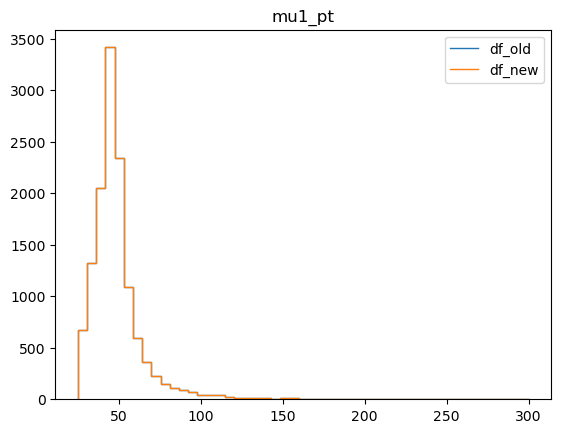

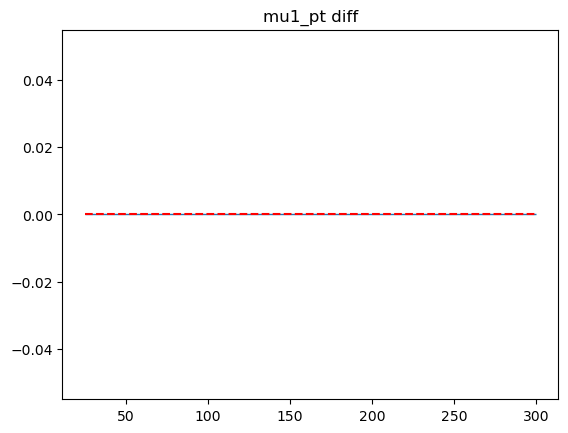

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


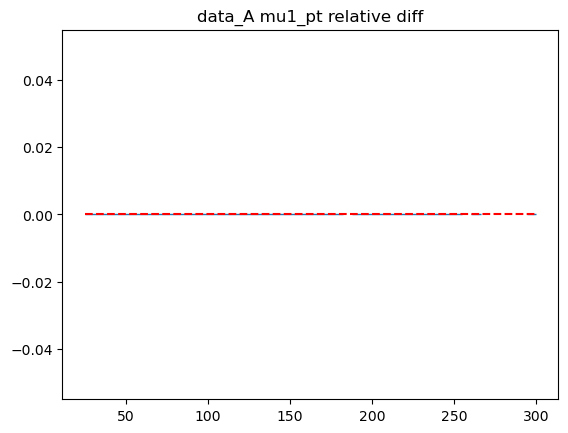

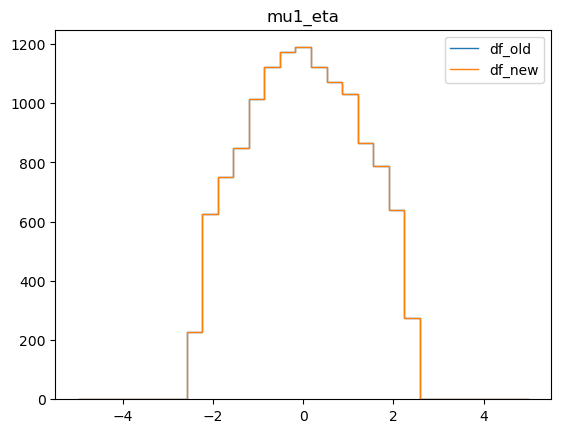

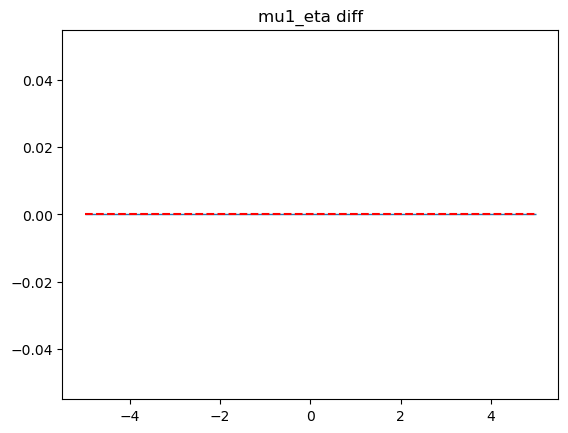

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


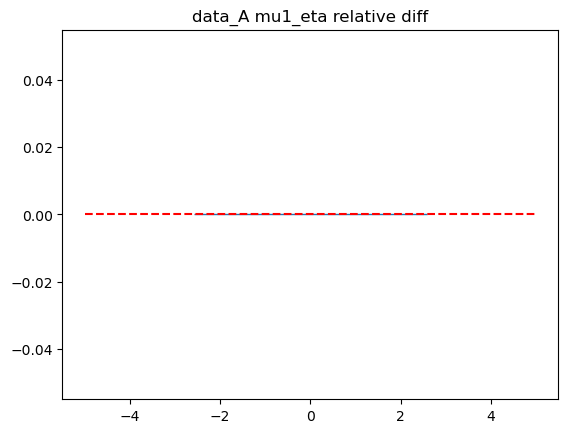

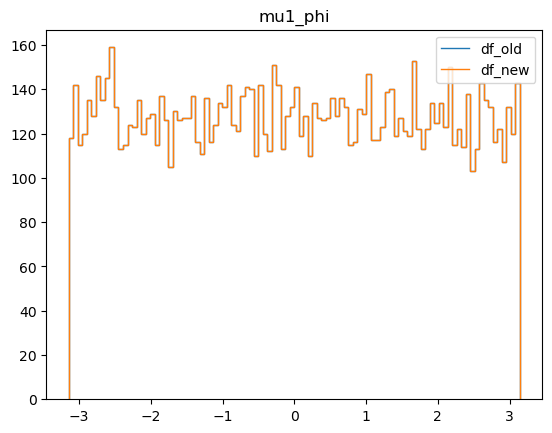

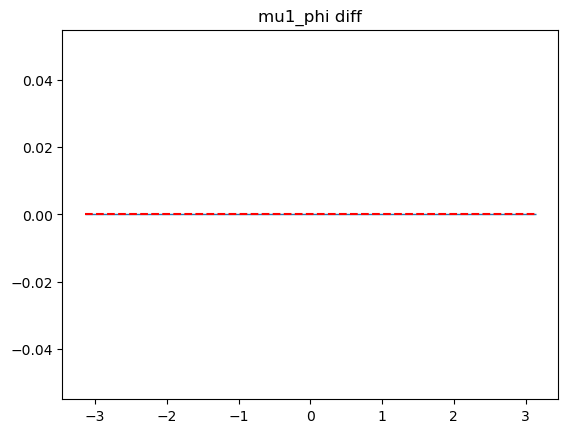

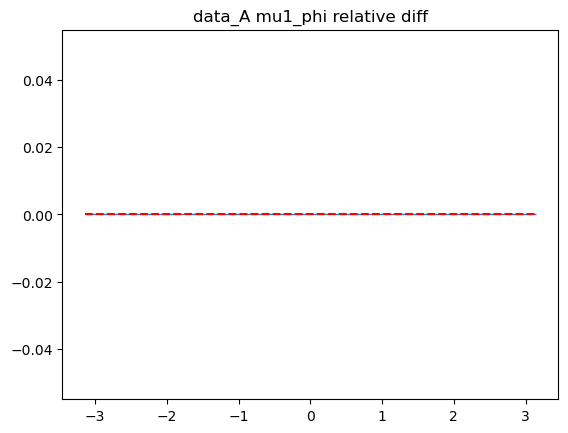

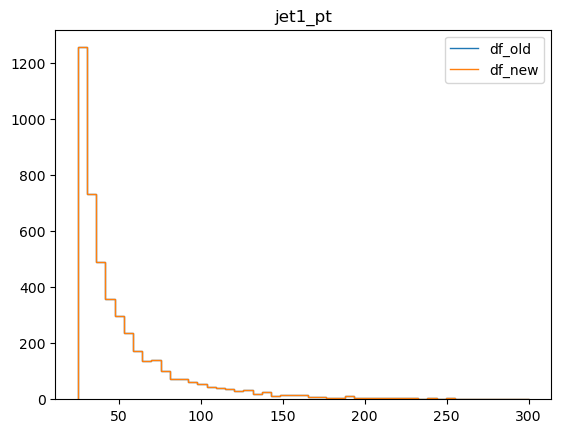

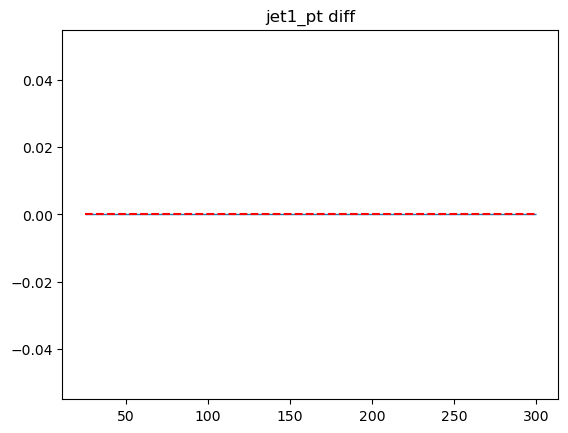

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


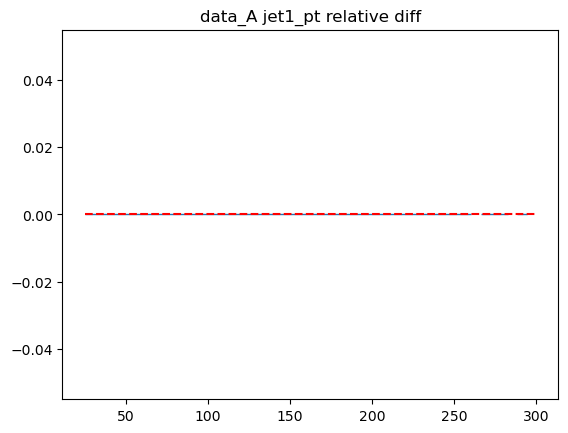

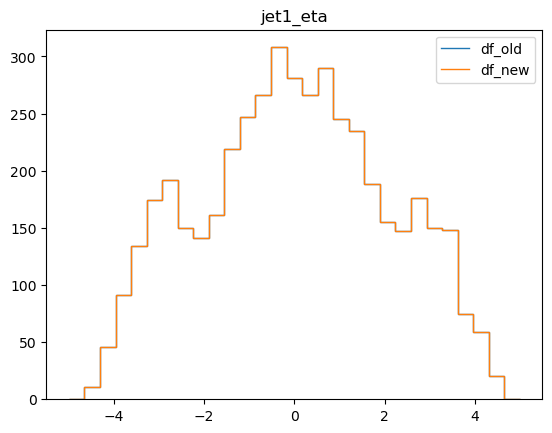

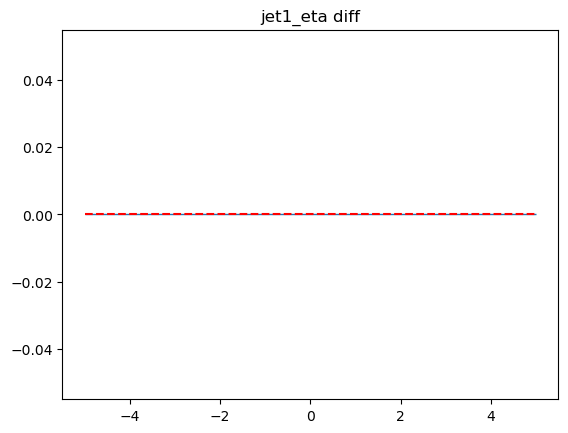

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


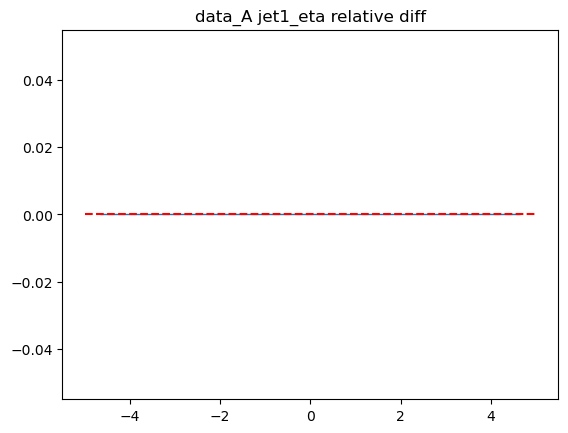

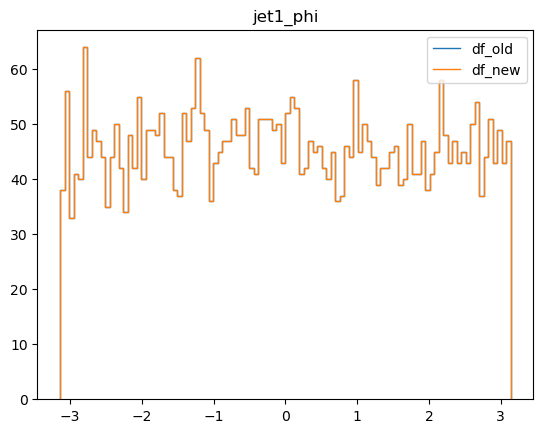

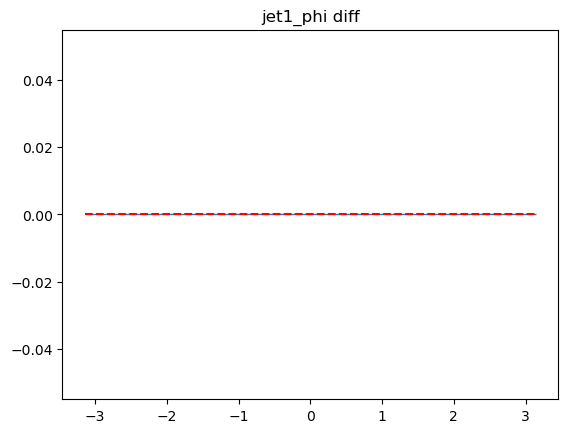

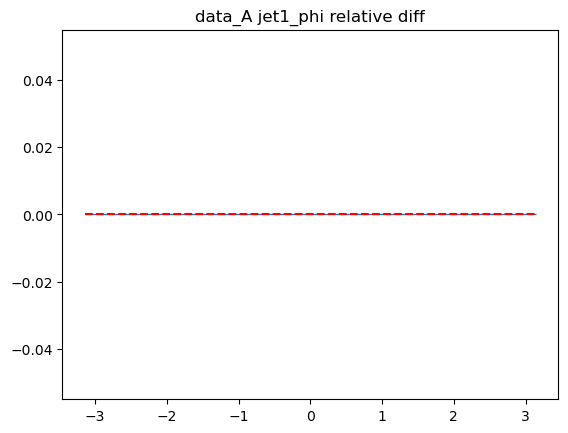

In [5]:
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             # "jet1_mass", 
             "jet1_pt", "jet1_eta", "jet1_phi"
            ]
# weights_old = df_old["weights"].compute()
weights_old = df_old["wgt_nominal"].compute()

weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
# print("adding qgl wgts!")
# qgl_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/qgl/wgt.parquet'
# qgl_wgts = ak.from_parquet(qgl_full_load_path)["qgl_nom"]
# print(f"qgl_wgts: {qgl_wgts}")
# weights_new = weights_new*qgl_wgts
#---------------------------------------------------
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    if "jet" in var:
        var_old = var+ "_nominal"
    else: 
        var_old = var
    hist_old, edges = np.histogram(df_old[var_old].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

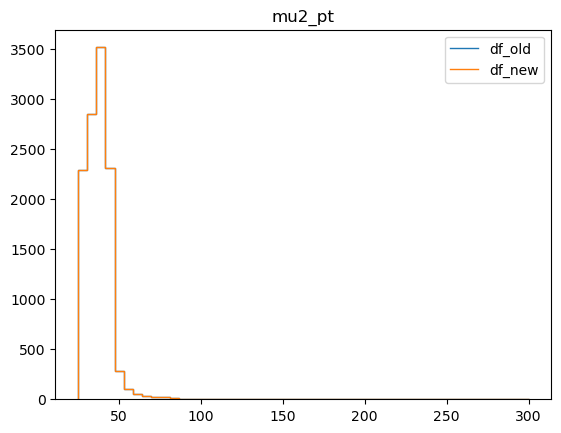

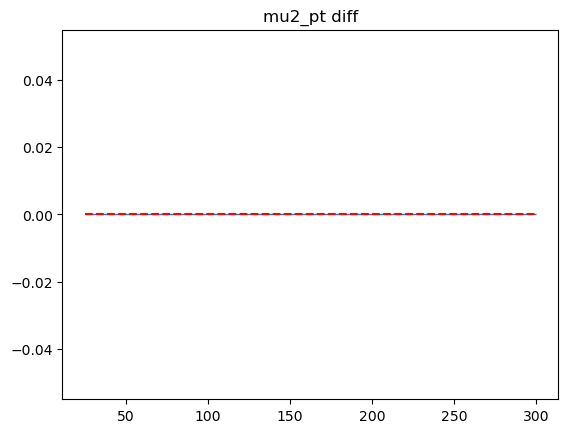

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


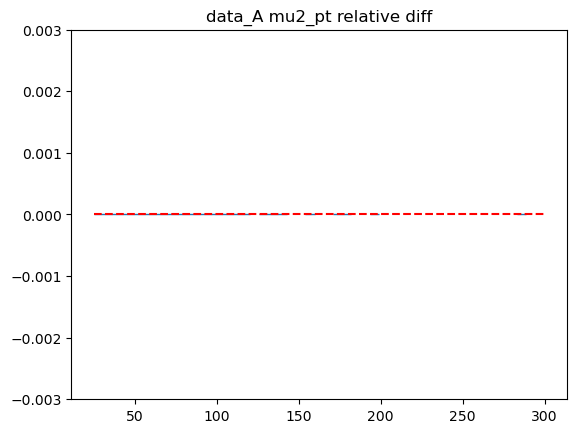

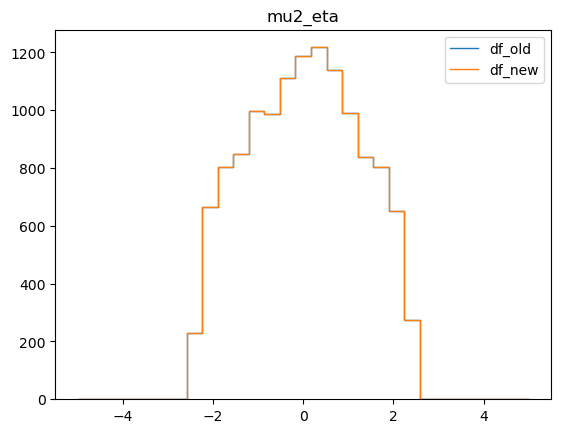

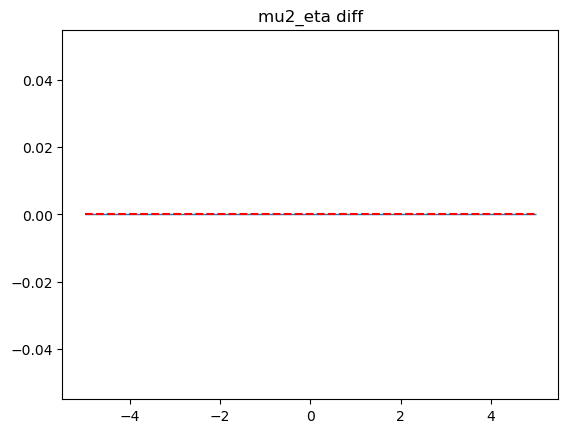

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


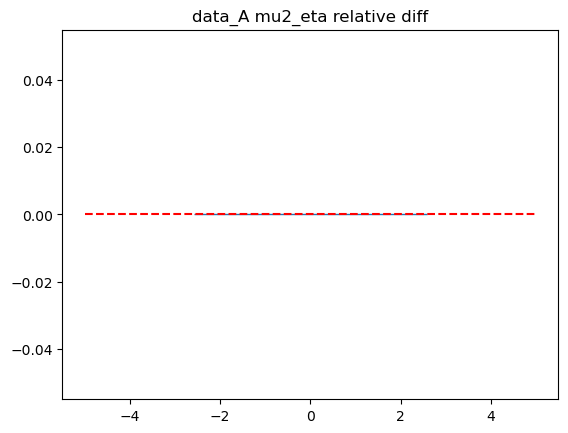

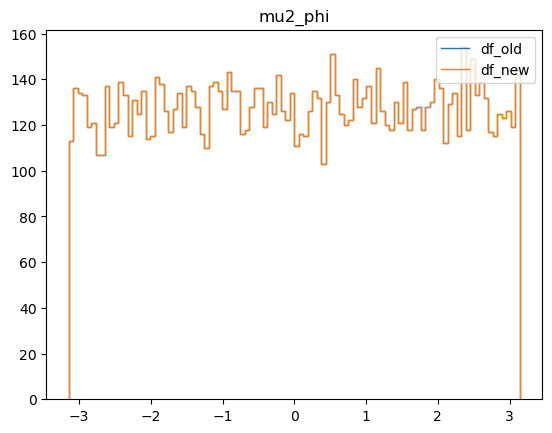

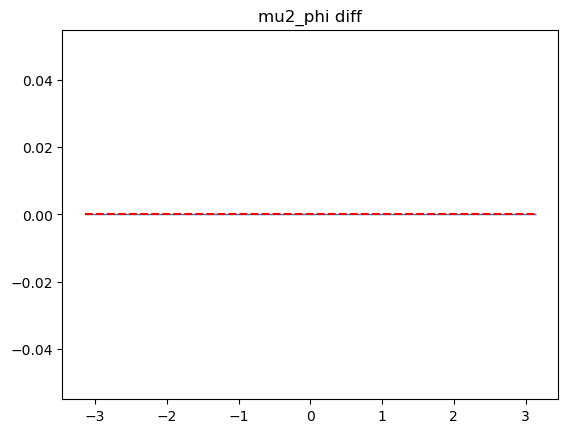

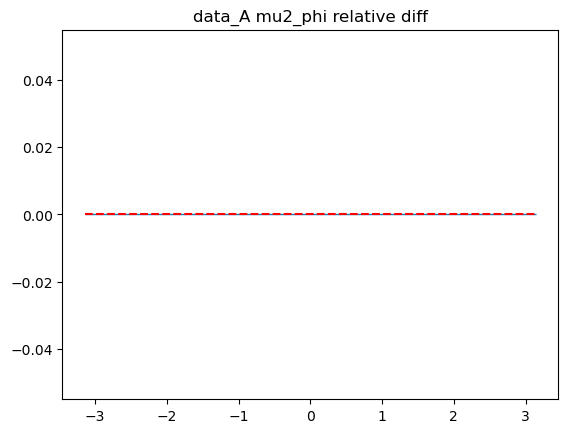

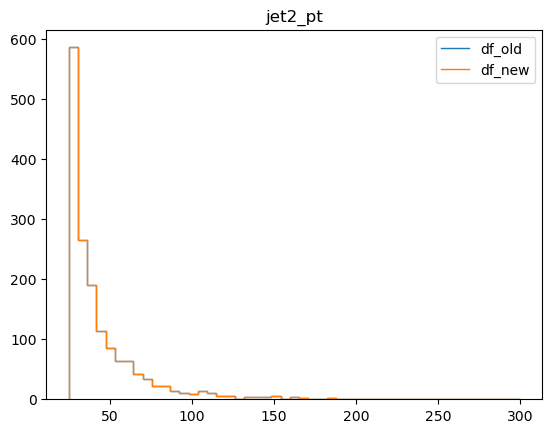

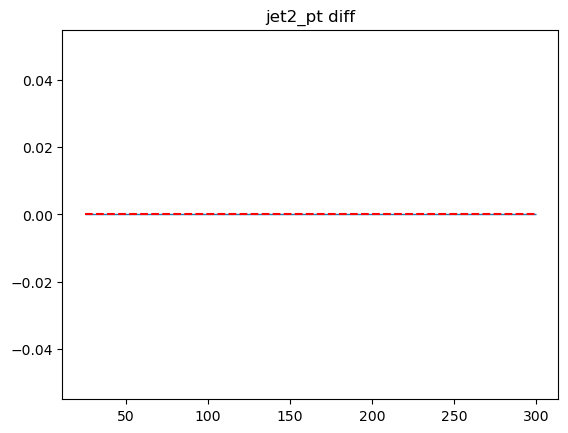

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


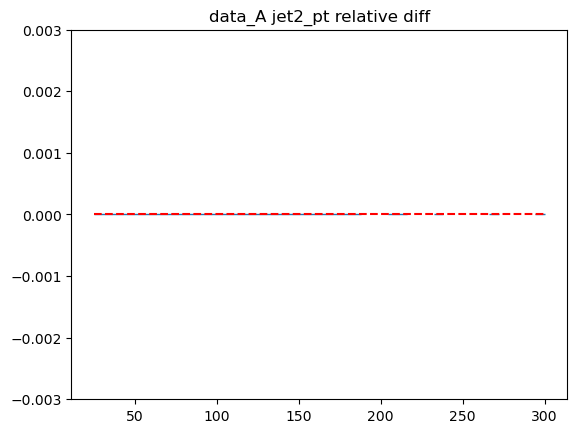

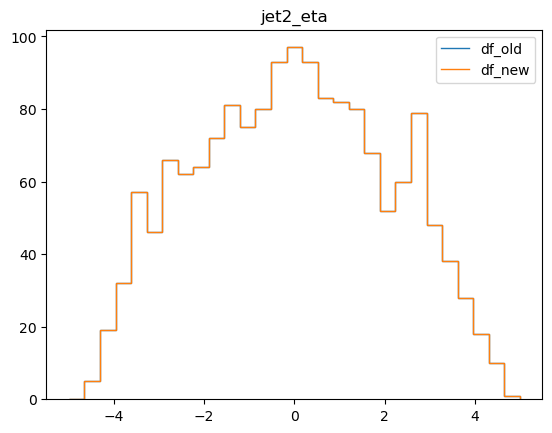

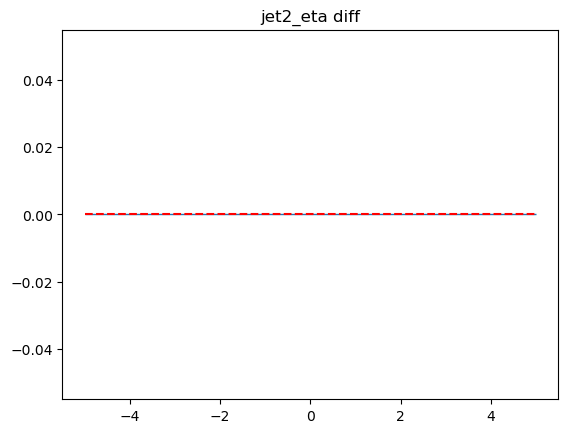

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


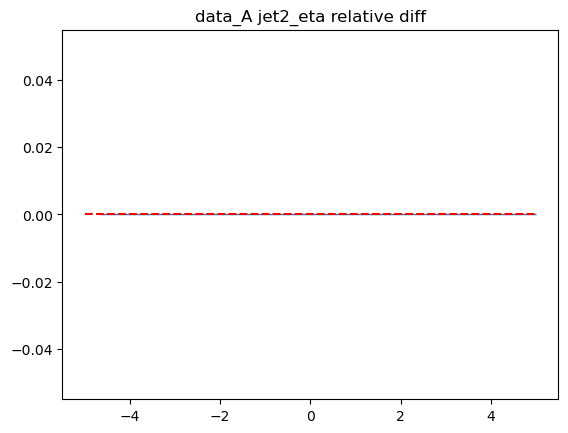

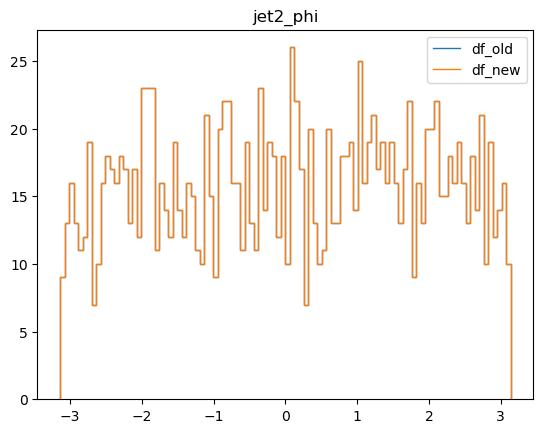

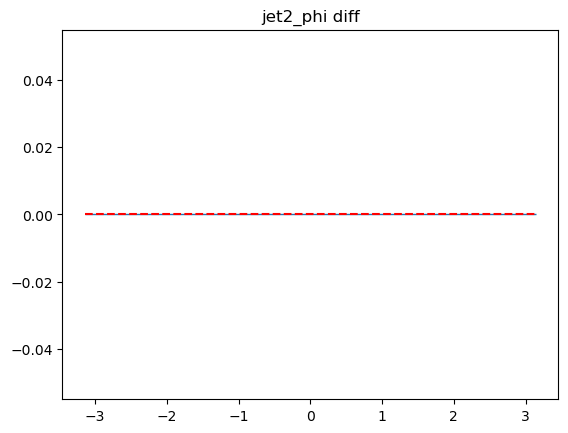

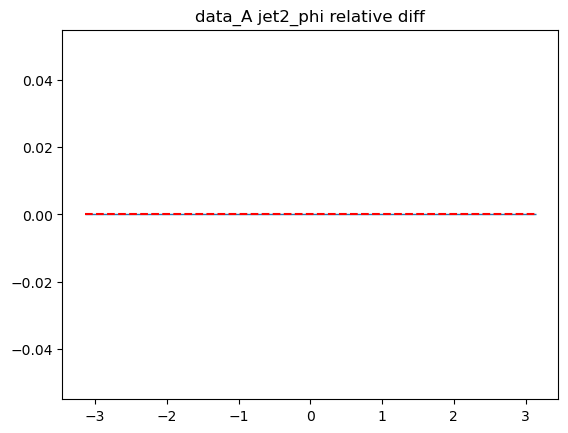

In [6]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             # "jet2_mass", 
             "jet2_pt", "jet2_eta", "jet2_phi"
            ]
# weights_old = df_old["weights"].compute()
weights_old = df_old["wgt_nominal"].compute()

weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
# print("adding qgl wgts!")
# qgl_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/*/qgl/wgt.parquet'
# qgl_wgts = ak.from_parquet(qgl_full_load_path)["qgl_nom"]
# print(f"qgl_wgts: {qgl_wgts}")
# weights_new = weights_new*qgl_wgts
#--------------------------------------------------- 
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    if "jet" in var:
        var_old = var+ "_nominal"
    else: 
        var_old = var
    hist_old, edges = np.histogram(df_old[var_old].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    if "pt" in var:
        plt.ylim(-0.003, 0.003)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

In [ ]:
for col in df_old.columns:
    print(col)

In [10]:
# """
# fsr version
# """
# variables = ["mu1_pt","mu1_eta", "mu1_phi", 
#              "jet1_mass", "jet1_pt", "jet1_eta", "jet1_phi"
#             ]
# fsr_mask_old = df_old["fsr_mask"].compute()
# fsr_mask_new = df_new["fsr_mask"].compute()
# weights_old = df_old["weights"].compute()[fsr_mask_old]
# weights_new = ak.to_numpy(df_new["weights"].compute())[fsr_mask_new]
# df_old = df_old[fsr_mask_old]
# df_new = df_new[fsr_mask_new]

# for var in variables:
#     kin = var.split("_")[-1]
#     # binning = np.linspace(*[25, 300, 50])
#     binning = np.linspace(*binning_map[kin])
#     # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
#     # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
#     # new_weights = np.ones(new_len)
#     # new_weights = new_weights*old_len/new_len
#     hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
#     # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
#     # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
#     hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
#     plt.stairs(hist_old, edges, label = "df_old")
#     plt.stairs(hist_new, edges, label = "df_new")
#     plt.legend(loc="upper right")
#     plt.title(var)
#     plt.show()
#     plt.stairs((hist_new-hist_old), edges)
#     plt.title(var+" diff")
#     plt.show()

In [11]:
# """
# fsr version for mu2, fsr_mask is already applied, so we don't change anything
# """
# # var = "mu1_pt"
# # var = "dimuon_mass"
# # var = "jet1_pt"
# # variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
# variables = ["mu2_pt","mu2_eta", "mu2_phi", 
#              "jet2_mass", "jet2_pt", "jet2_eta", "jet2_phi"
#             ]
# weights_old = df_old["weights"].compute()
# weights_new = ak.to_numpy(df_new["weights"].compute())
# for var in variables:
#     kin = var.split("_")[-1]
#     # binning = np.linspace(*[25, 300, 50])
#     binning = np.linspace(*binning_map[kin])
#     # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
#     # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
#     if 'mu' in var:
#         nvars_new = df_new["nmuons"].compute()
#         nvars_old = df_old["nmuons"].compute()
#     else:
#         nvars_new = df_new["njets"].compute()
#         nvars_old = df_old["njets"].compute()
#     hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
#     hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    
#     plt.stairs(hist_old, edges, label = "df_old")
#     plt.stairs(hist_new, edges, label = "df_new")
#     plt.legend(loc="upper right")
#     plt.title(var)
#     plt.show()
#     plt.stairs((hist_new-hist_old), edges)
#     plt.title(var+" diff")
#     plt.show()

In [70]:
# sum(df_old["mu1_pt"] ==np.nan)
fsr_mu1_pt_old = df_old["mu1_pt"].compute()
fsr_mu1_pt_new =  df_new["mu1_pt"].compute()
print(fsr_mu1_pt_old[fsr_mu1_pt_old != fsr_mu1_pt_new])
print(fsr_mu1_pt_new[fsr_mu1_pt_old != fsr_mu1_pt_new])
# df_old[]

entry
393      63.289581
669      63.089520
1550     45.827698
2286    110.583145
4710     61.832088
6403    166.207367
6643     44.467964
7378     59.695114
8396     80.743317
Name: mu1_pt, dtype: float32
[59.3, 62.4, 41.3, 80.7, 50.2, 156, 37.7, 48.8, 73.7]


In [20]:
nvars_new = df_new["jet1_mass"].compute()
nvars_old = df_old["jet1_mass"].compute()
# nvars_old
np.max(nvars_new)

141.125

In [21]:
diff = hist_old-hist_new
len(diff[diff !=0])

0

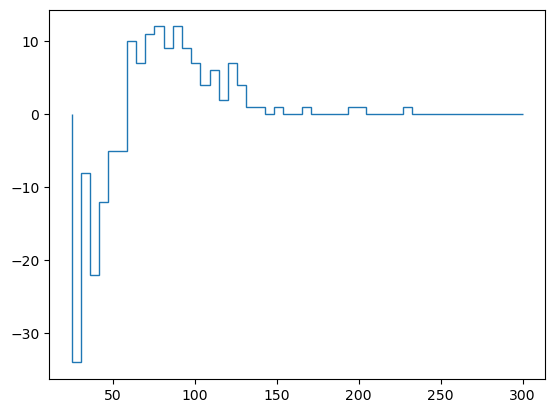

In [ ]:
# df_old.fields
# df_old["mu1_pt"].compute()
# df_old["region"].compute()
# df_old["wgt_nominal"].compute()


In [43]:
# (df_old).fields
regions = df_old.region.compute() 

In [59]:
# import dask.dataframe as dd
# import pandas as pd
# # df = dd.from_pandas(pd.DataFrame(), npartitions=1)
# df = dd.read_parquet(full_load_path)
# region = df.region.compute()

In [55]:
region== "h-peak"

entry
3067      True
4094     False
4405      True
6031     False
6797      True
         ...  
90309    False
90479    False
92886     True
94390    False
95004     True
Name: region, Length: 89712, dtype: bool[pyarrow]

In [60]:
region

entry
3067          h-peak
4094     h-sidebands
4405          h-peak
6031     h-sidebands
6797          h-peak
            ...     
90309    h-sidebands
90479    h-sidebands
92886         h-peak
94390    h-sidebands
95004         h-peak
Name: region, Length: 89712, dtype: string

In [58]:
df.columns

Index(['LHEMass', 'dataset', 'dimuon_cos_theta_cs', 'dimuon_cos_theta_cs_pisa',
       'dimuon_dEta', 'dimuon_dPhi', 'dimuon_dR', 'dimuon_ebe_mass_res',
       'dimuon_ebe_mass_res_rel', 'dimuon_eta', 'dimuon_mass', 'dimuon_phi',
       'dimuon_phi_cs', 'dimuon_phi_cs_pisa', 'dimuon_pisa_mass_res',
       'dimuon_pisa_mass_res_rel', 'dimuon_pt', 'dimuon_pt_log', 'event',
       'htsoft2_nominal', 'htsoft5_nominal', 'jet1_eta_nominal',
       'jet1_has_matched_gen_nominal', 'jet1_phi_nominal', 'jet1_pt_nominal',
       'jet1_qgl_nominal', 'jet2_eta_nominal', 'jet2_has_matched_gen_nominal',
       'jet2_phi_nominal', 'jet2_pt_nominal', 'jet2_qgl_nominal',
       'jj_dEta_nominal', 'jj_dPhi_nominal', 'jj_eta_nominal',
       'jj_mass_nominal', 'jj_mass_log_nominal', 'jj_phi_nominal',
       'jj_pt_nominal', 'll_zstar_log_nominal', 'met', 'mmj1_dEta_nominal',
       'mmj1_dPhi_nominal', 'mmj2_dEta_nominal', 'mmj2_dPhi_nominal',
       'mmj_min_dEta_nominal', 'mmj_min_dPhi_nominal', 'mmjj_e

In [8]:
A = np.ones(2, dtype="float32")
A.dtype

dtype('float32')

In [10]:
type(sum(A))

numpy.float64

In [12]:
type(np.sum(A))

numpy.float32

In [57]:
np.sqrt(-ak.from_numpy(np.ones(2)))

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/awkward/_nplikes/array_module.py:245: RuntimeWarning: invalid value encountered in sqrt
  return impl(*broadcasted_args, **(kwargs or {}))


<Array [nan, nan] type='2 * float64'>